# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [3]:
# After examining the Materials and Methods section of the paper, I found that there are 17 marketing campaigns.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.model_selection import cross_val_score
import pandas as pd

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [40]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [42]:
#Check null values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [43]:
#check duplicated rows
print(df.duplicated().sum())

12


In [44]:
# remove those duplicated rows
df = df.drop_duplicates()

In [45]:
#check whether there is unknown value in the columns
fields_for_checking = ['job','marital','education','default','housing','loan', 'contact']
for field in fields_for_checking:
  print("# Missing value in '"+field+"' variable: {0}".format(len(df.loc[df[field] == "unknown"])))

#remove those rows with unknown value
for field in fields_for_checking:
  if len(df.loc[df[field] == "unknown"])>0:
    df.drop(df[df[field] == "unknown"].index, inplace=True)

# Missing value in 'job' variable: 330
# Missing value in 'marital' variable: 80
# Missing value in 'education' variable: 1730
# Missing value in 'default' variable: 8596
# Missing value in 'housing' variable: 990
# Missing value in 'loan' variable: 990
# Missing value in 'contact' variable: 0


In [46]:
# Rename the column 'y' to a meaningful name
df.rename(columns = {'y':'Subscribed a term deposit'}, inplace = True)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        30478 non-null  int64  
 1   job                        30478 non-null  object 
 2   marital                    30478 non-null  object 
 3   education                  30478 non-null  object 
 4   default                    30478 non-null  object 
 5   housing                    30478 non-null  object 
 6   loan                       30478 non-null  object 
 7   contact                    30478 non-null  object 
 8   month                      30478 non-null  object 
 9   day_of_week                30478 non-null  object 
 10  duration                   30478 non-null  int64  
 11  campaign                   30478 non-null  int64  
 12  pdays                      30478 non-null  int64  
 13  previous                   30478 non-null  int

In [48]:
#Business Objective:
# To find out what feature(s)/ characteristic(s) of customers will lead to subscription of a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [49]:
# Make a copy of the original dataframe and just keep the bank information features (columns 1 - 7)
df_desiredFeaturesOnly = df.copy().iloc[:, 0:7]
#the above is equal to df[['age','job','marital','education','default','housing','loan']]

In [50]:
# define the target column for modelling
df_target = df[['Subscribed a term deposit']]
df_target['Subscribed a term deposit'] =  df_target['Subscribed a term deposit'].map({'yes': 1, 'no': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
# transform the columns
df_desiredFeaturesOnly = pd.get_dummies(df_desiredFeaturesOnly, columns = ['job'])
df_desiredFeaturesOnly = pd.get_dummies(df_desiredFeaturesOnly, columns = ['marital'])
df_desiredFeaturesOnly = pd.get_dummies(df_desiredFeaturesOnly, columns = ['education'])
df_desiredFeaturesOnly['housing'] = df_desiredFeaturesOnly['housing'].map({'yes': 1, 'no': 0})
df_desiredFeaturesOnly['default'] = df_desiredFeaturesOnly['default'].map({'yes': 1, 'no': 0})
df_desiredFeaturesOnly['loan'] = df_desiredFeaturesOnly['loan'].map({'yes': 1, 'no': 0})

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_desiredFeaturesOnly[['age']] = scaler.fit_transform(df_desiredFeaturesOnly[['age']])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [52]:
# split into train/test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(df_desiredFeaturesOnly, df_target, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [107]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier().fit(X_train, Y_train)
baseline_score = dummy_clf.score(X_test, Y_test)

print("The baseline performance that our classifier should aim to beat is {0}".format(str(baseline_score)))

The baseline performance that our classifier should aim to beat is 0.8704068241469817


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [54]:
from sklearn.linear_model import LogisticRegression
from time import time
# record start time before building the model
LR_start_time = time()
# start building LogisticRegression model
LR = LogisticRegression()
LR.fit(X_train, Y_train)
# record end time after building the model
LR_end_time = time()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Problem 9: Score the Model

What is the accuracy of your model?

In [68]:
from sklearn.metrics import accuracy_score
# perform prediction
LRPredict_test = LR.predict(X_test)
LRPredict_train = LR.predict(X_train)
print("The accuracy of my model is",accuracy_score(Y_test, LRPredict_test))

LR_cross_val_scores = cross_val_score(LR, X_train, Y_train.values.ravel(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (LR_cross_val_scores.mean(), LR_cross_val_scores.std()))

#kfold cv
kfold = KFold(n_splits=10, random_state=21, shuffle=True)
LR_cv_results_train = cross_val_score(LR, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
LR_cv_results_test = cross_val_score(LR, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')

The accuracy of my model is 0.8704068241469817
0.87 accuracy with a standard deviation of 0.00


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# build knn model with training time recorded
KNN_start_time = time()
KNN = KNeighborsClassifier()
KNNfit = KNN.fit(X_train, Y_train)
KNN_end_time = time()

# Predict the result from test and train datasets by using knn model
KNNPredict_test = KNN.predict(X_test)
KNNPredict_train = KNN.predict(X_train)

kfold = KFold(n_splits=10, random_state=21, shuffle=True)
knn_cv_results_train = cross_val_score(KNN, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
knn_cv_results_test = cross_val_score(KNN, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [61]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree model with training time recorded
DT_start_time = time()
DT = DecisionTreeClassifier()
DTFit = DT.fit(X_train,Y_train)
DT_end_time = time()

# Predict the result from test and train datasets by using decision tree model
DTPredict_test = DT.predict(X_test)
DTPredict_train = DT.predict(X_train)

DT_cv_results_train = cross_val_score(DT, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
DT_cv_results_test = cross_val_score(DT, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')

In [62]:
from sklearn import svm

# build support vector machine model with training time recorded
SVM_start_time = time()
svmModel = svm.SVC()
SVMFit = svmModel.fit(X_train,Y_train)
SVM_end_time = time()

# Predict the result from test and train datasets by using support vector machine model
SVMPredict_test = svmModel.predict(X_test)
SVMPredict_train = svmModel.predict(X_train)

SVM_cv_results_train = cross_val_score(svmModel, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')
SVM_cv_results_test = cross_val_score(svmModel, X_train, Y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
# initialize the data to be presented
data = [['Logistic Regression', LR_end_time-LR_start_time, accuracy_score(Y_train, LRPredict_train), accuracy_score(Y_test, LRPredict_test)], 
        ['KNN', KNN_end_time-KNN_start_time, accuracy_score(Y_train, KNNPredict_train), accuracy_score(Y_test, KNNPredict_test)], 
        ['Decision Tree', DT_end_time-DT_start_time, accuracy_score(Y_train, DTPredict_train), accuracy_score(Y_test, DTPredict_test)], 
        ['SVM', SVM_end_time-SVM_start_time, accuracy_score(Y_train, SVMPredict_train), accuracy_score(Y_test, SVMPredict_test)]]
  
# Create the pandas DataFrame
df_model_comparison = pd.DataFrame(data, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
df_model_comparison.set_index('Model')
df_model_comparison

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.399868,0.874707,0.870407
1,KNN,0.011558,0.876816,0.855752
2,Decision Tree,0.324517,0.904003,0.849191
3,SVM,12.545005,0.874707,0.870407


The baseline test accuracy is 0.870407. All of the models with default parameters cannot beat the baseline or just the same as the baseline.

In [69]:
# initialize the data to be presented
data = [['Logistic Regression', LR_end_time-LR_start_time, accuracy_score(Y_train, LRPredict_train), accuracy_score(Y_test, LRPredict_test), str(LR_cv_results_train.mean())+" ("+str(LR_cv_results_train.std())+")", str(LR_cv_results_test.mean())+" ("+str(LR_cv_results_test.std())+")"], 
        ['KNN', KNN_end_time-KNN_start_time, accuracy_score(Y_train, KNNPredict_train), accuracy_score(Y_test, KNNPredict_test), str(knn_cv_results_train.mean())+" ("+str(knn_cv_results_train.std())+")", str(knn_cv_results_test.mean())+" ("+str(knn_cv_results_test.std())+")"], 
        ['Decision Tree', DT_end_time-DT_start_time, accuracy_score(Y_train, DTPredict_train), accuracy_score(Y_test, DTPredict_test), str(DT_cv_results_train.mean())+" ("+str(DT_cv_results_train.std())+")", str(DT_cv_results_test.mean())+" ("+str(DT_cv_results_test.std())+")"], 
        ['SVM', SVM_end_time-SVM_start_time, accuracy_score(Y_train, SVMPredict_train), accuracy_score(Y_test, SVMPredict_test), str(SVM_cv_results_train.mean())+" ("+str(SVM_cv_results_train.std())+")", str(SVM_cv_results_test.mean())+" ("+str(SVM_cv_results_test.std())+")"]]
  
# Create the pandas DataFrame
df_model_comparison = pd.DataFrame(data, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy','Train neg_mean_squared_error by KFold CV [mean(std)]', 'Test neg_mean_squared_error by KFold CV [mean(std)]'])
df_model_comparison.set_index('Model')
df_model_comparison

,Model,Train Time,Train Accuracy,Test Accuracy,Train neg_mean_squared_error by KFold CV [mean(std)],Test neg_mean_squared_error by KFold CV [mean(std)]
0,Logistic Regression,0.399868,0.874707,0.870407,-0.12529312437964402 (0.005434196416288532),-0.12529312437964402 (0.005434196416288532)
1,KNN,0.011558,0.876816,0.855752,-0.13452729478437425 (0.0044541308303318984),-0.13452729478437425 (0.0044541308303318984)
2,Decision Tree,0.324517,0.904003,0.849191,-0.14591785443279634 (0.0063913212979446075),-0.1453084720799715 (0.006673034376173134)
3,SVM,12.545005,0.874707,0.870407,-0.12534000670500736 (0.005382174706256053),-0.12534000670500736 (0.005382174706256053)


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

# **More feature engineering and exploration**

I am unable to answer the question "Should we keep the gender feature? Why or why not?". Because gender does not exist in the data. I have refined the question a little bit: *should we keep the education feature? Why or why not?"*

In [70]:
# First, I find out the subscription percentage relative to the education level
count_education_subscription_percentage = pd.crosstab(df['Subscribed a term deposit'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_subscription_percentage = count_education_subscription_percentage.transpose()

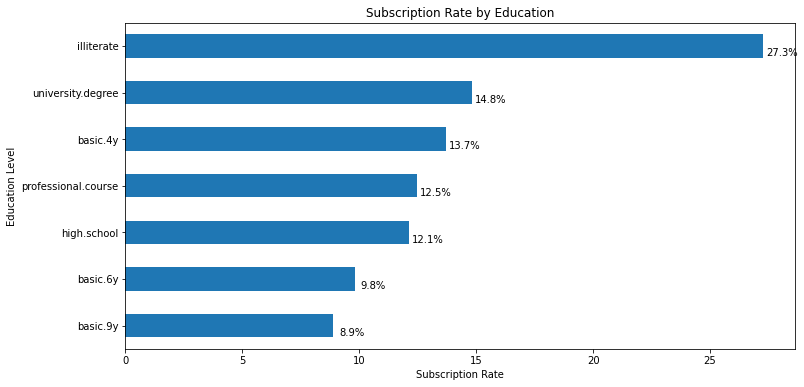

In [71]:
plot_job = count_education_subscription_percentage['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Level')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_education_subscription_percentage['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Then, I check the permutation importance

r2
mean +/- std
225073924760995125285355520.000 +/- 2023739948783003020296192.000
197039526077867191233937408.000 +/- 1647235264028824114823168.000
94668285645923037697015808.000 +/- 381742471643610962984960.000
8752098346828236014485504.000 +/- 70859720794508995067904.000
7372998400067341102612480.000 +/- 28807393502878347821056.000
4733342851729065001353216.000 +/- 15844097323846397329408.000
4688122271777712716644352.000 +/- 27025759316585798959104.000
2798821770426488482430976.000 +/- 3789432730169253036032.000
1686957567332353591738368.000 +/- 3484330428343421239296.000
36249242175477500608512.000 +/- 100235061897548660736.000
26845155728722948521984.000 +/- 151793647398582452224.000
26191932160117823242240.000 +/- 155337807463486947328.000
15134956790659015507968.000 +/- 97034655004973563904.000
14051592640209340071936.000 +/- 493058230.788
12483568984482864168960.000 +/- 23212473014931103744.000
6788859230977074921472.000 +/- 64631317141331386368.000
6129803309050488684544.000 +

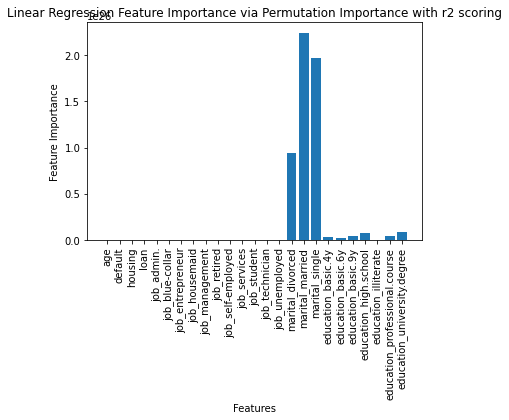

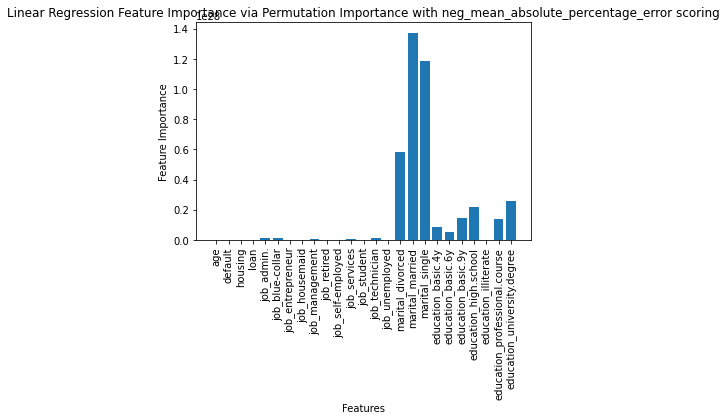

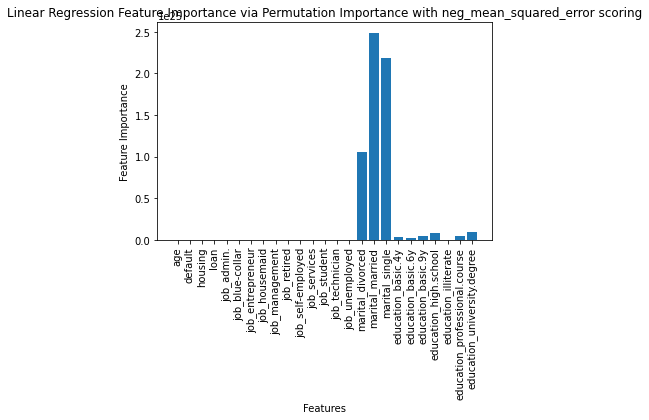

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

# define the model
df_target_boolean = df_target['Subscribed a term deposit'].map({'yes': 1, 'no': 0})
LinearR_model = LinearRegression().fit(df_desiredFeaturesOnly, df_target_boolean)

# perform permutation importance
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
results = permutation_importance(LinearR_model, df_desiredFeaturesOnly, df_target_boolean, scoring=scoring)

# get importance
for metric in results:
  print(f"{metric}")
  print("mean +/- std")
  r = results[metric]
  for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
      print(f"{r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")


# plot feature importance
for i in range(0,3):
  results = permutation_importance(LinearR_model, df_desiredFeaturesOnly, df_target_boolean, scoring=scoring[i])
  importance = results.importances_mean
  pyplot.bar([df_desiredFeaturesOnly.columns[x] for x in range(len(importance))], importance)
  plt.xlabel('Features') 
  plt.ylabel('Feature Importance')
  plt.xticks(rotation=90)
  plt.title("Linear Regression Feature Importance via Permutation Importance with "+scoring[i]+" scoring")
  pyplot.show()

From the above findings, the 4 important features in order are marital_married, marital_single, marital_divorced and education_university.degree . I see that education is somehow important, but it is not as important as marital.

Here I try to remove education related features to see whether the accuracy will be dramatically affected.

In [ ]:
from sklearn import svm
# split into train/test datasets
from sklearn.model_selection import train_test_split

# remove education related features
unwanted = X_train.columns[X_train.columns.str.startswith('education_')]
X_train_eduRemoved = X_train.copy().drop(unwanted, axis=1, inplace=False)
X_test_eduRemoved = X_test.copy().drop(unwanted, axis=1, inplace=False)

# build logistic regression model
LR.fit(X_train_eduRemoved, Y_train)
# Predict the result from test and train datasets by using logistic regression model
LRPredict_test_eduRemoved = LR.predict(X_test_eduRemoved)
LRPredict_train_eduRemoved = LR.predict(X_train_eduRemoved)

# build knn model
KNNfit = KNN.fit(X_train_eduRemoved, Y_train)

# Predict the result from test and train datasets by using knn model
KNNPredict_test_eduRemoved = KNN.predict(X_test_eduRemoved)
KNNPredict_train_eduRemoved = KNN.predict(X_train_eduRemoved)

# build decision tree model
DTFit_eduRemoved = DT.fit(X_train_eduRemoved,Y_train)

# Predict the result from test and train datasets by using decision tree model
DTPredict_test_eduRemoved = DT.predict(X_test_eduRemoved)
DTPredict_train_eduRemoved = DT.predict(X_train_eduRemoved)

# build support vector machine model
svmModel = svm.SVC()
SVMFit = svmModel.fit(X_train_eduRemoved,Y_train)

# Predict the result from test and train datasets by using support vector machine model
SVMPredict_test_eduRemoved = svmModel.predict(X_test_eduRemoved)
SVMPredict_train_eduRemoved = svmModel.predict(X_train_eduRemoved)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# initialize the data to be presented
data = [['Logistic Regression', accuracy_score(Y_train, LRPredict_train), accuracy_score(Y_test, LRPredict_test), accuracy_score(Y_train, LRPredict_train_eduRemoved), accuracy_score(Y_test, LRPredict_test_eduRemoved)], 
        ['KNN', accuracy_score(Y_train, KNNPredict_train), accuracy_score(Y_test, KNNPredict_test), accuracy_score(Y_train, KNNPredict_train_eduRemoved), accuracy_score(Y_test, KNNPredict_test_eduRemoved)], 
        ['Decision Tree', accuracy_score(Y_train, DTPredict_train), accuracy_score(Y_test, DTPredict_test), accuracy_score(Y_train, DTPredict_train_eduRemoved), accuracy_score(Y_test, DTPredict_test_eduRemoved)], 
        ['SVM', accuracy_score(Y_train, SVMPredict_train), accuracy_score(Y_test, SVMPredict_test), accuracy_score(Y_train, SVMPredict_train_eduRemoved), accuracy_score(Y_test, SVMPredict_test_eduRemoved)]]
  
# Create the pandas DataFrame
df_model_comparison = pd.DataFrame(data, columns=['Model', 'Train Accuracy Before Education Feature Removed', 'Test Accuracy Before Education Feature Removed', 'Train Accuracy After Education Feature Removed', 'Test Accuracy After Education Feature Removed'])
df_model_comparison

,Model,Train Accuracy Before Education Feature Removed,Test Accuracy Before Education Feature Removed,Train Accuracy After Education Feature Removed,Test Accuracy After Education Feature Removed
0,Logistic Regression,0.874707,0.870407,0.874707,0.870407
1,KNN,0.876816,0.855752,0.875879,0.862314
2,Decision Tree,0.904003,0.850175,0.886425,0.861220
3,SVM,0.874707,0.870407,0.874707,0.870407


From the above, after removing education related features, the accuracy did not change in SVM and Logistric Regression. While for KNN and Decision Tree, the train accuracy has slightly decreased after removal and the test accuracy has slightly increased after removal.

To sum up, we can skip the education feature if the increase in 1% accuracy is not of concern.

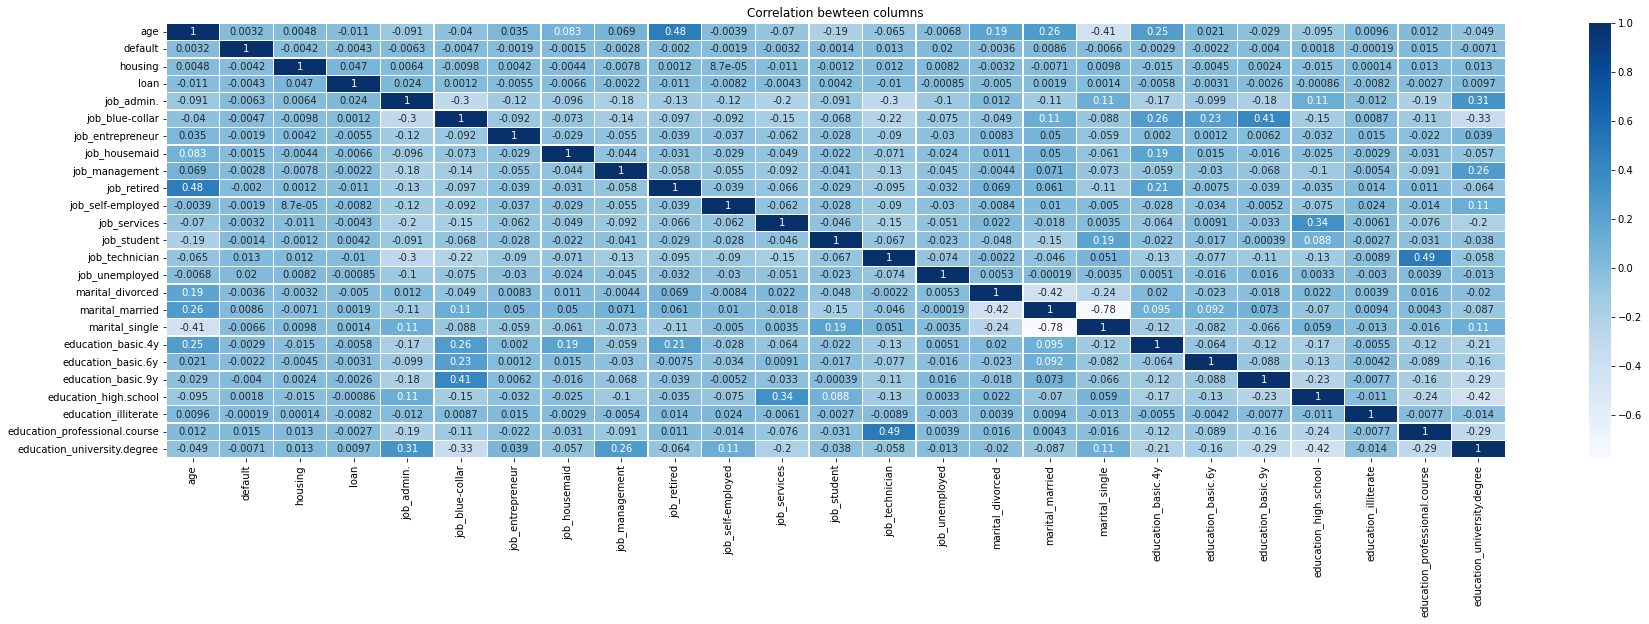

In [ ]:
plt.figure(figsize=(30,8))
plt.title("Correlation bewteen columns")
dataframe_features_with_target = pd.concat([df_desiredFeaturesOnly,df_target])
sns.heatmap(dataframe_features_with_target.corr(), linewidth=0.4,cmap="Blues", annot=True)

# **Hyperparameter tuning and grid search**

In [74]:
from sklearn.model_selection import GridSearchCV

gs_decision_tree = GridSearchCV(DecisionTreeClassifier(), {
    'min_samples_split': [5, 10, 20, 30, 40, 50], 
    'max_depth': list(range(1,15)),
    'criterion': ['gini', 'entropy']
    }, cv= 5)
gs_decision_tree.fit(X_train, Y_train)
print(gs_decision_tree.best_estimator_)

DecisionTreeClassifier(max_depth=1, min_samples_split=5)


In [75]:
model = KNeighborsClassifier()
parameters_to_try_knn = {'n_neighbors': np.array(range(1, 31,2)),
            'weights': ['uniform', 'distance'],
            'p': [1, 2]}
  
# defining parameter range
gs_knn = GridSearchCV(estimator = model, param_grid = parameters_to_try_knn, cv=5, scoring='accuracy')
  
# fitting the model for grid search
gs_knn.fit(X_train, Y_train.values.ravel())
print(gs_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=15)


In [ ]:
parameters_to_try_SVM = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}
gs_SVM = GridSearchCV(estimator = SVMFit, param_grid = parameters_to_try_SVM, cv = 5, scoring='accuracy',n_jobs=-1)
gs_SVM.fit(X_train, Y_train.values.ravel())
grid_score = gs_SVM.score(X_test, Y_test.values.ravel())
print(gs_SVM.best_params_)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
parameters_to_try_SVM = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0],}
halving_cv_SVM = HalvingGridSearchCV(svmModel, parameters_to_try_SVM, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3)
halving_cv_SVM.fit(X_train, Y_train.values.ravel())
print(halving_cv_SVM.best_estimator_)

Since the CV runtime for SVM is very large (I have waited for 10 hours and it still has not yet finished. Even faster method HalvingGridSearchCV was used, I still cannot get the result within acceptable timeframe), I tried another method by subsampling the dataset to estimate the best estimator within acceptable timeframe.

In [81]:
def fit_cv_subsample (pipe_cv, X, y, n_max = 10_000):
    X_sub = X[0:n_max]
    y_sub = y[0:n_max]
    pipe_cv.fit(X_sub,y_sub)
    return pipe_cv, pipe_cv.best_estimator_
gs_SVM = HalvingGridSearchCV(estimator = SVMFit, param_grid = parameters_to_try_SVM, cv = 5, scoring='accuracy', n_jobs=-1)

results, best_model = fit_cv_subsample(gs_SVM, df_desiredFeaturesOnly, df_target.values.ravel(), 5000)
print(best_model)

SVC(gamma=10.0, kernel='linear')


# **Adjust performance metric**

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


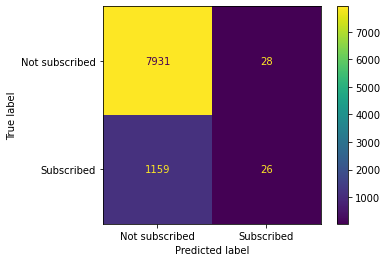

The accuracy of the model is 0.8701881014873141


In [116]:
# build knn model
KNN = KNeighborsClassifier(n_neighbors=15)
KNNfit = KNN.fit(X_train, Y_train)

# Predict the result from test and train datasets by using knn model
KNNPredict_test = KNN.predict(X_test)
KNNPredict_train = KNN.predict(X_train)

knn_confusion_mat = confusion_matrix(Y_test, KNNPredict_test, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_mat, display_labels=['Not subscribed', 'Subscribed'])
disp.plot()
plt.show()


print("The accuracy of the model is",accuracy_score(Y_test, KNNPredict_test))



1.   From the above, there are 7931 true positive cases (not subscribed to term deposit and predicted correctly).
2.   From the above, there are 1159 false negative cases (subscribed to term deposit and predicted incorrectly).
3.   From the above, there are 28 false positive cases (not subscribed to term deposit and predicted incorrectly as subscribed).
4.   From the above, there are 26 true negative cases (subscribed to term deposit and predicted correctly as subscribed).



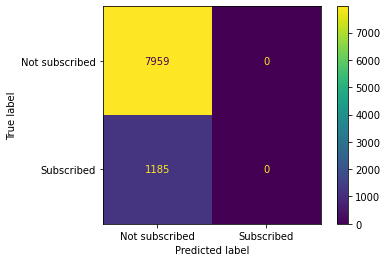

The accuracy of the model is 0.8704068241469817


In [113]:
# build decision tree model
DT = DecisionTreeClassifier(max_depth=1, min_samples_split=5)
DTFit = DT.fit(X_train,Y_train)

# Predict the result from test and train datasets by using decision tree model
DTPredict_test = DT.predict(X_test)
DTPredict_train = DT.predict(X_train)

DT_confusion_mat = confusion_matrix(Y_test, DTPredict_test, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=DT_confusion_mat, display_labels=['Not subscribed', 'Subscribed'])
disp.plot()
plt.show()


print("The accuracy of the model is",accuracy_score(Y_test, DTPredict_test))



1.   From the above, there are 7959 true positive cases (not subscribed to term deposit and predicted correctly).
2.   From the above, there are 1185 false negative cases (subscribed to term deposit and predicted incorrectly).
3.   From the above, there are 0 false positive case (not subscribed to term deposit and predicted incorrectly as subscribed).
4.   From the above, there are 0 true negative case (subscribed to term deposit and predicted correctly as subscribed).



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


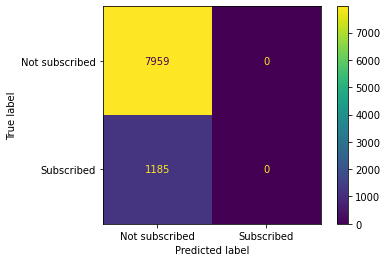

The accuracy of the model is 0.8704068241469817


In [111]:
# build support vector machine model
svmModel = svm.SVC(gamma=10.0, kernel='linear')
SVMFit = svmModel.fit(X_train,Y_train)

# Predict the result from test and train datasets by using support vector machine model
SVMPredict_test = svmModel.predict(X_test)
SVMPredict_train = svmModel.predict(X_train)

SVM_confusion_mat = confusion_matrix(Y_test, SVMPredict_test, labels=svmModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=SVM_confusion_mat, display_labels=['Not subscribed', 'Subscribed'])
disp.plot()
plt.show()

print("The accuracy of the model is",accuracy_score(Y_test, SVMPredict_test))



1.   From the above, there are 7959 true positive cases (not subscribed to term deposit and predicted correctly).
2.   From the above, there are 1185 false negative cases (subscribed to term deposit and predicted incorrectly).
3.   From the above, there are 0 false positive case (not subscribed to term deposit and predicted incorrectly as subscribed).
4.   From the above, there are 0 true negative case (subscribed to term deposit and predicted correctly as subscribed).



##### Further works:



1.   The data is imbalance. Some methods like SMOTE need to be used
2.   Try to enhance the SVM model to make it work in GridSearchCV in a resonable timeframe
3.   Try more parameters in GridSearchCV

